In [27]:
# General dependencies
import os, shutil
from os.path import join
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy
from glob import glob
import math
from math import floor
import scipy

In [28]:
# LCBD dependencies
# add relative path to our toolbox
import sys
sys.path.append('../../../..') # path to preprocessing from here

from LCBDtools.scripts import argParser
from LCBDtools.src import Plots
from LCBDtools.src import Statistics
from LCBDtools.src import TimeSeries
from LCBDtools.Stimuli.Flanker import TaskReader

In [29]:
# Some configuration variables
dataDir = "/data/perlman/moochie/study_data/P-CAT/task_data"
PSUdataDir = "/data/perlman/moochie/study_data/P-CAT/PSU_data/task_data"
participant_num_len = 4 # default length of participant numbers
task = "Flanker"

In [30]:
# from data tracker July 12th 2022, list of subjects with v3 Flanker completed
in_subs = [
    "1115",
    "1116",
#     "1110", didn't do flanker, less 80% practice
    "1114",
#     "1119", # refused to flank
    "1121",
    "1122",
    "1126",
    "1125",
    "1127",
#     "1128", sibling participated
    "1129",
    "1134",
    "1130",
#     "1131", <20% on practice
#     "1137", lower extreme on KBIT
#     "1124", # took off cap midway through, they did the first couple blocks
    "1133",
#     "1138", <20% on practice 
    "1144",
    "1143",
#     "1141", <20% on practice
    "1145",
    "1149",
    "1154",
    "1155",
#     "1142", <20% on practice
    "1148",
    "1156",
    # june 24 updates
    "1159",
    # "1160", failed practice
]

# PSU stuff
PSU_insubs = [
    "1202",
#     "1203", # issue... no flanker data collected
    "1204",
#     "1205", # failed practice
    "1207",
    "1209",
    "1211",
    "1213",
#     "1214", # failed practice
#     "1216", # failed practice
    "1219",
    "1220",
#     "1221", # failed practice
#     "1222", # failed practice
    "1223",
#     "1234", # failed practice
#     "1229", # failed practice 
#     "1231", # failed practice
    "1238",
    "1226",
]

for sub in PSU_insubs:
    in_subs.append(sub)

In [31]:
len(in_subs) - len(PSU_insubs)

21

In [32]:
all_subs = [
    "1102", 
    "1109",  
    "1103",  
    "1104",  
    "1112",  
    "1115",  
    "1116",  
    "1110",  
    "1117",  
    "1118",  
    "1114",  
    "1119",  
    "1121",  
    "1122",  
    "1126",  
    "1113",  
    "1125",  
    "1127",  
    "1128",  
    "1129",  
    "1134",  
    "1130",  
    "1131",  
    "1137",  
    "1124",  
    "1133",  
    "1138",  
    "1144",  
    "1143",  
    "1151",  
    "1145",  
    "1141",  
    "1147",  
    "1149",  
    "1154",  
    "1155",  
    "1152",  
    "1139",  
    "1142",  
    "1148",  
    "1156",  
    "1159",  
    "1160"]

# PSU stuff
PSU_subs = [
    "1200",
    "1201",
    "1202",
    "1203",
    "1204",
    "1205",
    "1206",
    "1207",
    "1208",
    "1209",
    "1210",
    "1211",
    "1212",
    "1213",
    "1214",
    "1216",
    "1218",
    "1219",
    "1220",
    "1221",
    "1222",
    "1223",
    "1225",
    "1226",
    "1227",
    "1228",
    "1229",
    "1231",
    "1232",
    "1234",
    "1235",
    "1236",
    "1237",
    "1238",
    "1239"]

for sub in PSU_subs:
    all_subs.append(sub)

In [33]:
len(PSU_subs)

35

In [34]:
len(all_subs) - len(PSU_subs)

43

In [35]:
ages = [
    6.42026009582478,
    5.1006160164271,
    6.38193018480493,
    4.68993839835729,
    7.97809719370294,
    6.55989048596851,
    7.43326488706366,
    4.8952772073922,
    6.78439425051335,
    5.09787816563997,
    4.58316221765914,
    4.51471594798084,
    7.87953456536619,
    5.37987679671458,
    7.97535934291581,
    4.03285420944559,
    7.71252566735113,
    7.81656399726215,
    0,
    7.45516769336071,
    5.86173853524983,
    6.6009582477755,
    4.3750855578371,
    4.07939767282683,
    6.13826146475017,
    4.35318275154004,
    5.13894592744695,
    5.7056810403833,
    7.42778918548939,
    4.51745379876797,
    6.40930869267625,
    4.03011635865845,
    6.01779603011636,
    7.67693360711841,
    6.94318959616701,
    4.35592060232717,
    0,
    0,
    4.03832991101985,
    5.93018480492813,
    5.36344969199179,
    4.25462012303290,
    0]

# PSU stuff
PSU_ages = [
    5.88364134154689,
    0.0,
    5.71663244353183,
    5.84804928131417,
    5.91375770020534,
    6.37645448323066,
    0.0,
    6.08624229979466,
    0.0,
    5.30047912388775,
    0.0,
    4.18617385352498,
    0.0,
    4.85694729637235,
    4.42710472279261,
    0.0,
    0.0,
    6.92676249144422,
    6.34086242299795,
    4.99657768651609,
    4.50376454483231,
    5.68377823408624,
    0.0,
    7.84941820670773,
    0.0,
    0.0,
    4.20807665982204,
    4.99383983572895,
    0.0,
    4.34496919917865,
    0.0,
    0.0,
    0.0,
    6.48596851471595,
    0.0]

for age in PSU_ages:
    ages.append(age)

In [36]:
print(len(PSU_ages))

35


In [37]:
if len(ages) != len(all_subs):
    print("AGES ERROR")

In [38]:
fnames = [fname for fname in glob(join(dataDir, '*', '*_'+task, '*.csv')) if \
    os.path.basename(fname)[:participant_num_len] in in_subs]

In [39]:
PSUfnames = [fname for fname in glob(join(PSUdataDir, '*', '*_'+task, '*.csv')) if \
    os.path.basename(fname)[:participant_num_len] in in_subs]

In [40]:
d_dataset = {}

for fname in fnames:
    try:
        flanker_series = TaskReader(fname).flankerSeries
        subject = os.path.basename(fname)[:participant_num_len]

        for flank in flanker_series:
            flank.eval()
            flank.meta['age'] = ages[all_subs.index(subject)]

        d_dataset[subject] = flanker_series
        
    except:
        print("Error encountered @ subject:", os.path.basename(fname)[:participant_num_len])  

In [41]:
for fname in PSUfnames:
    try:
        flanker_series = TaskReader(fname).flankerSeries
        subject = os.path.basename(fname)[:participant_num_len]

        for flank in flanker_series:
            flank.eval()
            flank.meta['age'] = ages[all_subs.index(subject)]

        d_dataset[subject] = flanker_series
        
    except:
        print("Error encountered @ subject:", os.path.basename(fname)[:participant_num_len]) 

In [42]:
print([os.path.basename(fname)[:participant_num_len] for fname in PSUfnames])

['1220', '1202', '1211', '1223', '1213', '1219', '1238', '1207', '1226', '1209', '1204']


In [43]:
print(len(PSUfnames))

11


In [44]:
len(d_dataset)

32

In [45]:
def write_avgs(outfile=None):
    
    df = pd.DataFrame(
        columns=[
            "subject",
            "age",
            "N RTs",
            "N trials",
            "mean RT (session)",
            "accuracy (session)",
            "IES",
            "mean RT (congruent)",
            "accuracy (congruent)",
            "IES (congruent)",
            "mean RT (incongruent)",
            "accuracy (incongruent)",
            "IES (incongruent)",
            "mean RT (directional)",
            "accuracy (directional)",
            "IES (directional)",
            "mean RT (indirectional)",
            "accuracy (indirectional)",
            "IES (indirectional)"])
    
#     df.set_index('subject')
    
    for subject in d_dataset.keys():
        flanker = d_dataset[subject]
        real_flanks = [flank for flank in flanker if not math.isnan(flank.meta['response_time'])]
        
        df.loc[subject, :] = [
            
            # sub and demographic
            int(subject), # subject
            float(ages[all_subs.index(subject)]), # age
            
            # session data
            int(len([flank for flank in real_flanks])), # N RTs
            int(len(flanker)), # N trials
            float(np.mean([flank.meta['response_time'] for flank in real_flanks])), # session mean RT
            float(np.mean([flank.meta['correct'] for flank in real_flanks])), # session accuracy
            float( # IES = mean session RT / proportion of correct responses
                np.mean([flank.meta['response_time'] for flank in real_flanks]) /\
                (len([flank for flank in real_flanks if flank.meta['correct']]) /\
                    len(real_flanks))),
            
            # congruent (directional)
            float(np.mean([flank.meta['response_time'] for flank in real_flanks if \
                flank.meta['congruent']])), # mean RT congruent
            float(np.mean([flank.meta['correct'] for flank in real_flanks if \
                flank.meta['congruent']])), # accuracy congruent
            float( # IES = congruent RT / proportion of correct responses
                # congruent RT divided by:
                np.mean([flank.meta['response_time'] for flank in real_flanks if\
                    (flank.meta['congruent']) and (flank.meta['directional'])]) /\
                # proportion of correct responses in congruent
                (len([flank for flank in real_flanks if\
                        (flank.meta['congruent']) and (flank.meta['directional']) and (flank.meta['correct'])]) /\
                    len([flank for flank in real_flanks if (flank.meta['congruent']) and (flank.meta['directional'])]))), 
            
            # incongruent (directional)
            float(np.mean([flank.meta['response_time'] for flank in real_flanks if \
                (flank.meta['congruent'] is False) and (flank.meta['directional'] is True)])), # mean RT incongruent
            float(np.mean([flank.meta['correct'] for flank in real_flanks if \
                (flank.meta['congruent'] is False) and (flank.meta['directional'] is True)])), # accuracy incongruent
            float( # IES = incongruent RT / proportion of correct responses
                # incongruent RT divided by:
                np.mean([flank.meta['response_time'] for flank in real_flanks if\
                    (not flank.meta['congruent']) and (flank.meta['directional'])]) /\
                # proportion of correct responses in incongruent
                (len([flank for flank in real_flanks if\
                        (not flank.meta['congruent']) and (flank.meta['directional']) and (flank.meta['correct'])]) /\
                    len([flank for flank in real_flanks if (not flank.meta['congruent']) and (flank.meta['directional'])]))), 
                 
            # directional (congruent or incongruent)
            float(np.mean([flank.meta['response_time'] for flank in real_flanks if \
                flank.meta['directional'] is True])), # mean RT directional
            float(np.mean([flank.meta['correct'] for flank in real_flanks if \
                flank.meta['directional'] is True])), # accuracy directional
            float( # IES = directional RT / proportion of correct responses
                # directional RT divided by:
                np.mean([flank.meta['response_time'] for flank in real_flanks if\
                    flank.meta['directional']]) /\
                # proportion of correct responses in directional
                (len([flank for flank in real_flanks if\
                        (flank.meta['directional']) and (flank.meta['correct'])]) /\
                    len([flank for flank in real_flanks if flank.meta['directional']]))), 
            
            # indirectional (neither)
            float(np.mean([flank.meta['response_time'] for flank in real_flanks if \
                flank.meta['directional'] is False])), # mean RT indirectional
            float(np.mean([flank.meta['correct'] for flank in real_flanks if \
                flank.meta['directional'] is False])), # accuracy indirectional
            float( # IES = indirectional RT / proportion of correct responses
                # indirectional RT divided by:
                np.mean([flank.meta['response_time'] for flank in real_flanks if\
                    not flank.meta['directional']]) /\
                # proportion of correct responses in indirectional
                (len([flank for flank in real_flanks if\
                        (not flank.meta['directional']) and (flank.meta['correct'])]) /\
                    len([flank for flank in real_flanks if not flank.meta['directional']]))), 
        ]
    
    if outfile is not None:
        df.to_csv(outfile)
        
    return df
    
df = write_avgs("/data/perlman/moochie/analysis/P-CAT/behavioral_metrics_combined.csv")

In [46]:
df

,subject,age,N RTs,N trials,mean RT (session),accuracy (session),IES,mean RT (congruent),accuracy (congruent),IES (congruent),mean RT (incongruent),accuracy (incongruent),IES (incongruent),mean RT (directional),accuracy (directional),IES (directional),mean RT (indirectional),accuracy (indirectional),IES (indirectional)
1143,1143,7.427789,148,150,0.627807,0.945946,0.663681,0.622913,0.959184,0.64942,0.64706,0.918367,0.704577,0.634987,0.938776,0.676399,0.613733,0.96,0.639306
1134,1134,5.861739,145,150,0.621688,0.910345,0.682915,0.593227,0.938776,0.631916,0.67358,0.875,0.769806,0.63299,0.907216,0.697727,0.598849,0.916667,0.65329
1149,1149,7.676934,146,150,0.715747,0.952055,0.751792,0.667699,1.0,0.667699,0.754001,0.979592,0.769709,0.711294,0.989691,0.718704,0.724561,0.877551,0.825663
1115,1115,6.55989,145,150,0.709677,0.924138,0.767934,0.69644,0.92,0.757,0.699616,0.913043,0.766246,0.697962,0.916667,0.761413,0.73263,0.938776,0.78041
1127,1127,7.816564,150,150,0.51455,0.946667,0.543539,0.503355,0.96,0.524328,0.516196,0.9,0.573551,0.509775,0.93,0.548145,0.524101,0.98,0.534797
1133,1133,4.353183,111,150,0.989501,0.864865,1.144111,0.949465,0.885714,1.071977,0.993797,0.756757,1.313232,0.972247,0.819444,1.186471,1.021356,0.948718,1.076564
1144,1144,5.705681,147,150,0.637057,0.952381,0.66891,0.607754,1.0,0.607754,0.672742,0.86,0.782258,0.640576,0.929293,0.689316,0.629799,1.0,0.629799
1116,1116,7.433265,149,150,0.629571,0.979866,0.642507,0.63073,0.98,0.643602,0.671527,0.98,0.685232,0.651128,0.98,0.664417,0.585575,0.979592,0.597775
1159,1159,4.25462,137,150,0.864958,0.919708,0.940471,0.841362,0.934783,0.900061,0.947575,0.833333,1.13709,0.895598,0.882979,1.014292,0.797977,1.0,0.797977
1154,1154,6.94319,143,150,0.669354,0.895105,0.747793,0.665468,0.913043,0.728846,0.619898,0.791667,0.783029,0.642198,0.851064,0.754583,0.721448,0.979592,0.736478


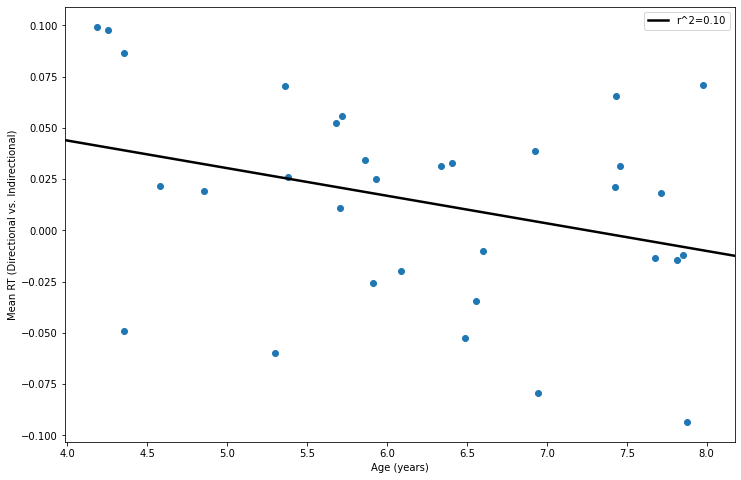

In [47]:
fig, ax = plt.subplots()

scatter = ax.scatter(
    df['age'].astype(float),
    df['mean RT (directional)'].astype(float) - df['mean RT (indirectional)'].astype(float)
)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df['age'].astype(float), df['mean RT (directional)'].astype(float) - df['mean RT (indirectional)'].astype(float))

xseq = np.linspace(0, max(df['age'])+0.2, num=100)

bestfit = ax.plot(xseq, intercept + slope * xseq, color='k', lw=2.5, label='r^2={:.2f}'.format(r_value**2))

plt.xlabel('Age (years)')
plt.ylabel("Mean RT (Directional vs. Indirectional)")
plt.xlim((min(df['age'])-0.2, max(df['age'])+0.2))
plt.legend()

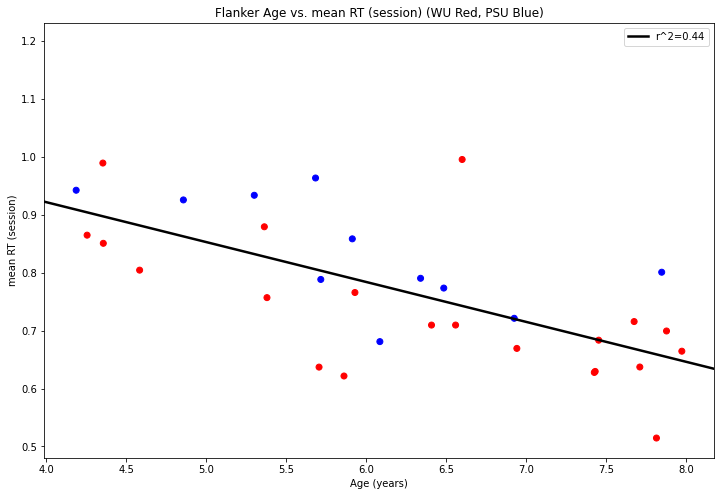

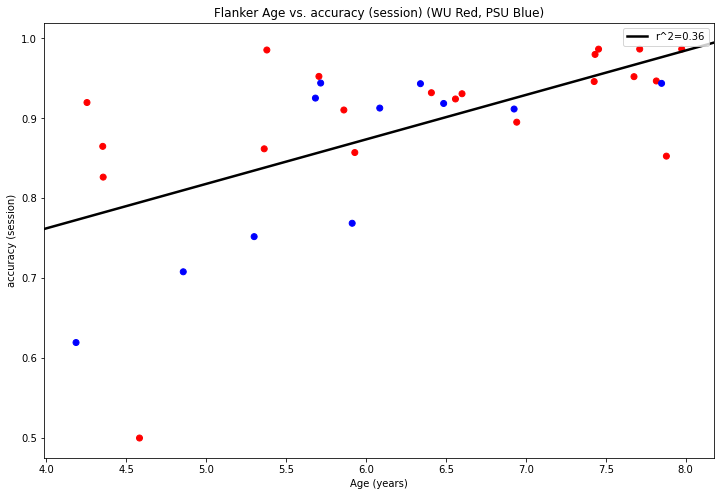

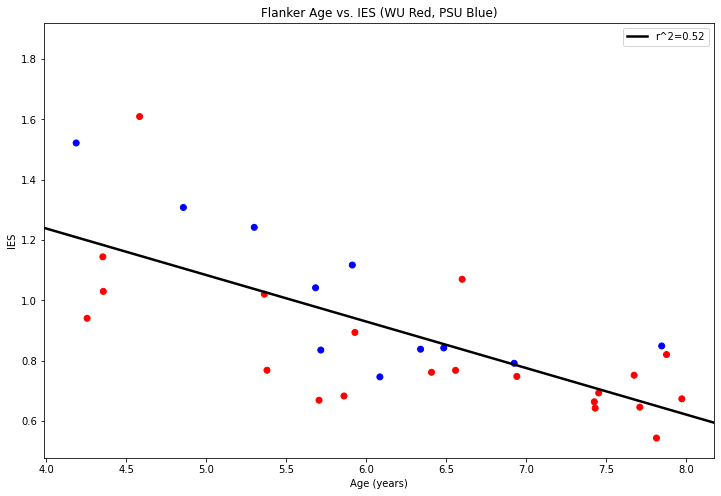

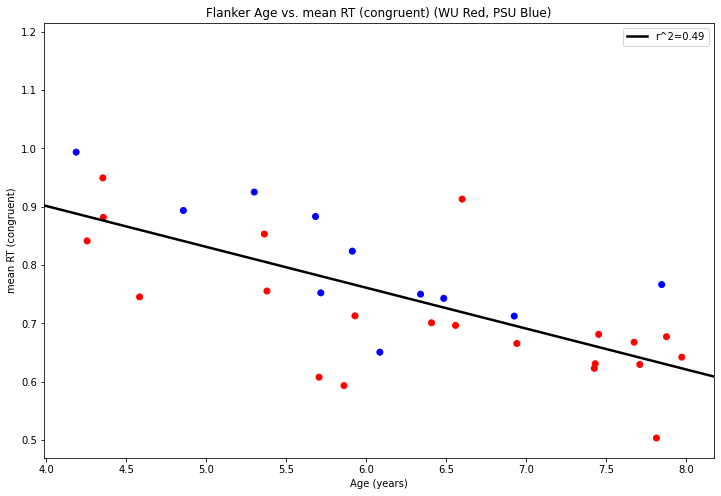

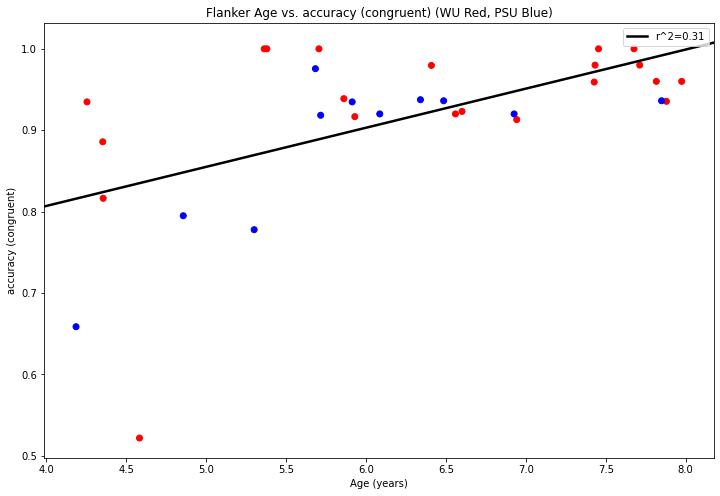

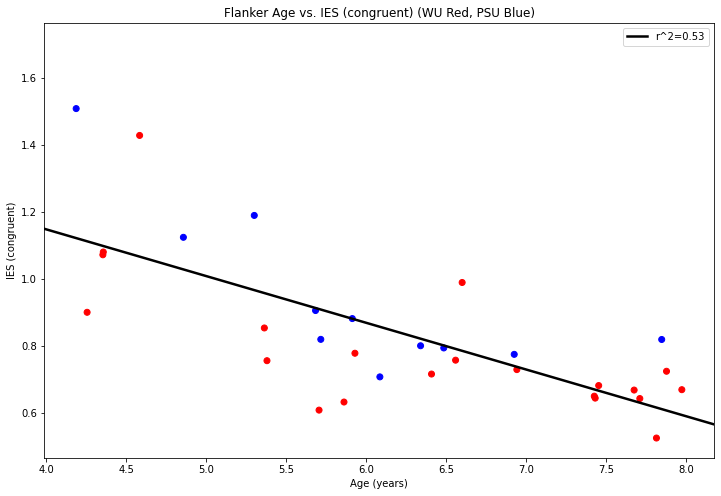

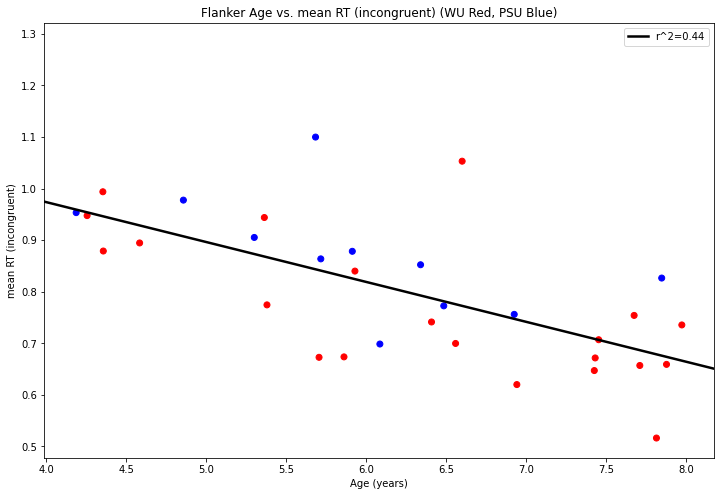

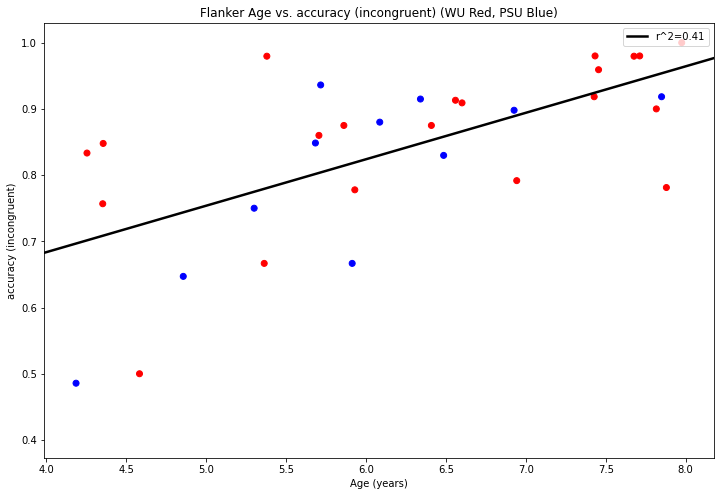

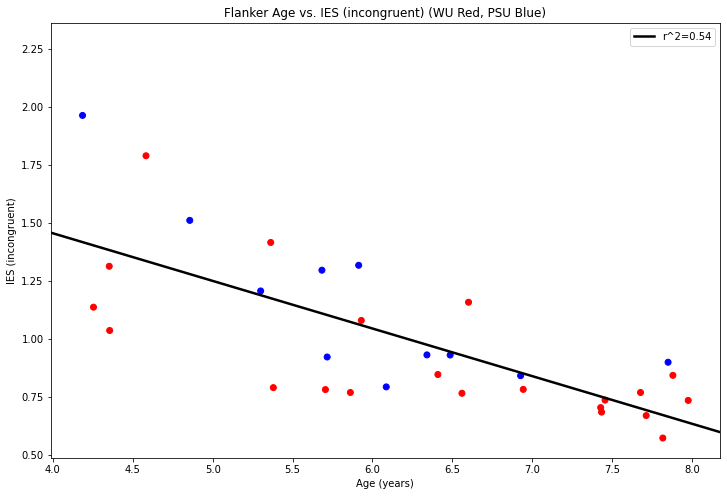

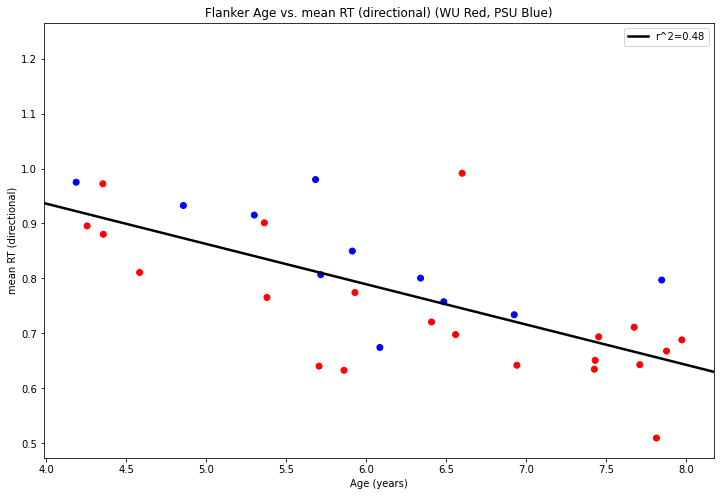

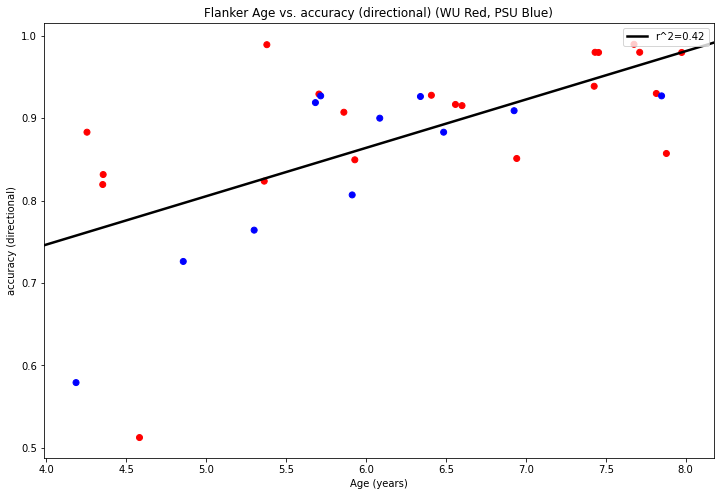

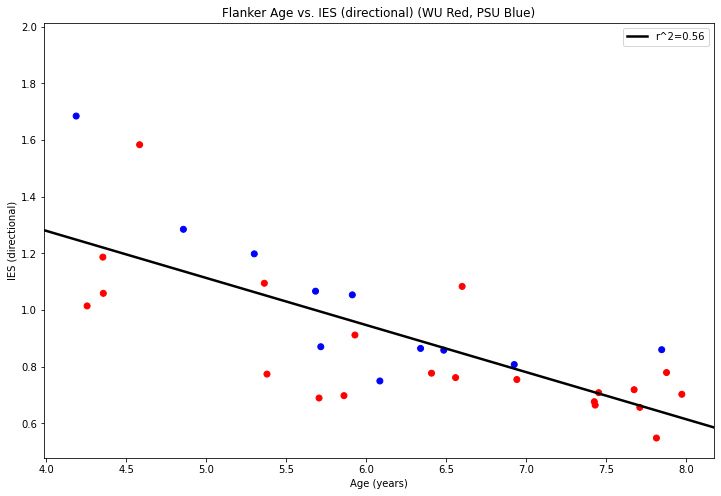

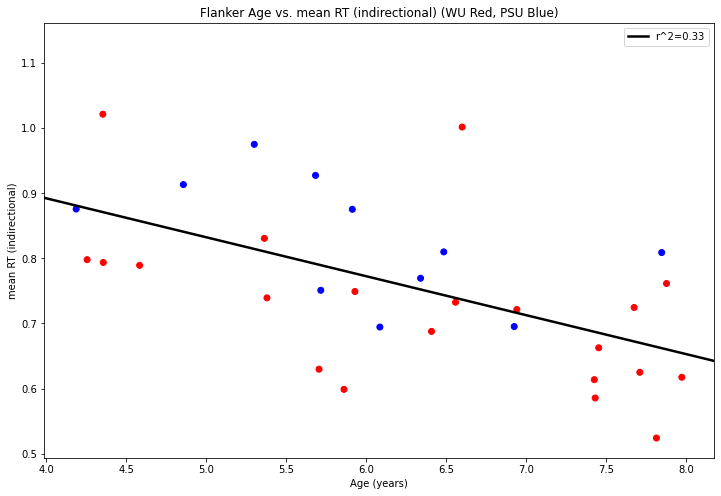

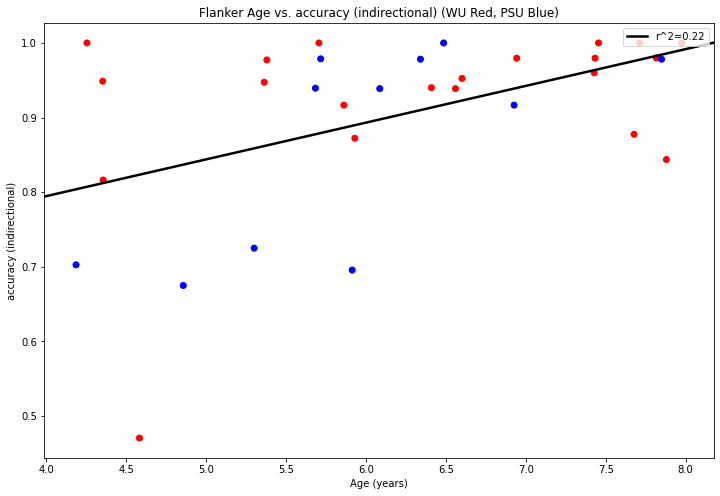

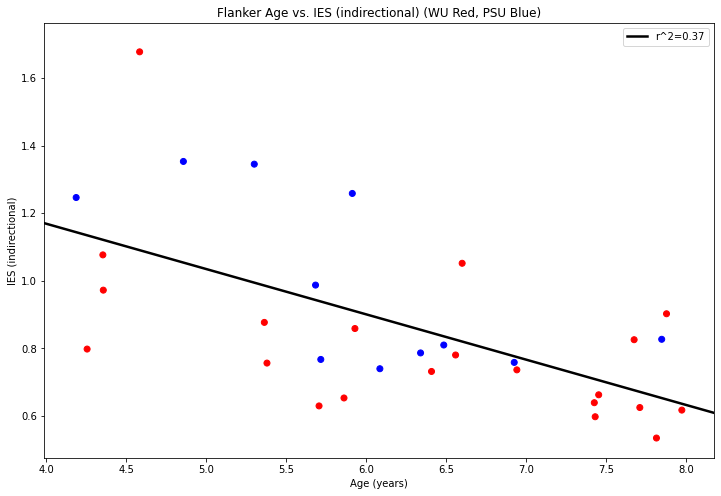

In [48]:
plt.rcParams['savefig.facecolor']='white'

cols = [col for col in df.columns if \
    ("mean" in col) or ("accuracy" in col) or ("IES" in col)]

for coi in cols:

    fig, ax = plt.subplots()

    c=['red' if str(sub) not in PSU_insubs else 'blue' for sub in df['subject']]
    
    scatter = ax.scatter(
        df['age'].astype(float),
        df[coi].astype(float),
        c=c)

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df['age'].astype(float), df[coi].astype(float))

    xseq = np.linspace(0, max(df['age'])+0.2, num=100)

    bestfit = ax.plot(xseq, intercept + slope * xseq, color='k', lw=2.5, label='r^2={:.2f}'.format(r_value**2))

    plt.xlabel('Age (years)')
    plt.ylabel(coi)
    plt.xlim((min(df['age'])-0.2, max(df['age'])+0.2))
    plt.title('Flanker Age vs. ' + coi + ' (WU Red, PSU Blue)')

    plt.legend(loc="upper right")

    plt.savefig("/data/perlman/moochie/analysis/P-CAT/RTplot_{}_2.png".format(coi))

In [51]:
len(d_dataset['1159'])

150

In [52]:
# these subjects have missing data maybe? they have version 3 but aren't here. 
# maybe they don't actually have real flanker?
print([sub for sub in in_subs if sub not in list(d_dataset.keys())])

[]


In [53]:
# these subjects have actual flanker data loaded in:
print(list(d_dataset.keys()))

['1143', '1134', '1149', '1115', '1127', '1133', '1144', '1116', '1159', '1154', '1129', '1130', '1145', '1156', '1121', '1114', '1126', '1148', '1122', '1155', '1125', '1220', '1202', '1211', '1223', '1213', '1219', '1238', '1207', '1226', '1209', '1204']


In [26]:
d_dataset['1143'][0].meta

{'trial_n': 1,
 'block': 1,
 'corr_answer': 'right',
 'stim_file': 'stimuli/trial_block1_D_IR.png',
 'directional': True,
 'congruent': False,
 'stim_start_time': 148.8814254,
 'stim_stop_time': 149.8868478,
 'response': 'right',
 'response_time': 1.1343523,
 'fixation_start_time': 147.4024356,
 'fixation_stop_time': 148.915589,
 'correct': True,
 'age': 7.42778918548939}

In [32]:
# subject 1124 only answered 80 of them
len([flank for flank in d_dataset['1124'] if flank.meta['correct'] in [True, False]])

80

In [33]:
dataset = []

for sub in d_dataset.keys():
    for flank in d_dataset[sub]:
        dataset.append(flank)

In [34]:
# Plots.plot_outcome_hist(
#     [flank.meta['response_time'] for flank in dataset],
#     [flank.meta['congruent'] for flank in dataset],
#     xlabel="Response Time",
#     title="Congruency (Incongruent=0, Congurent=1)",
#     n_bins=10)

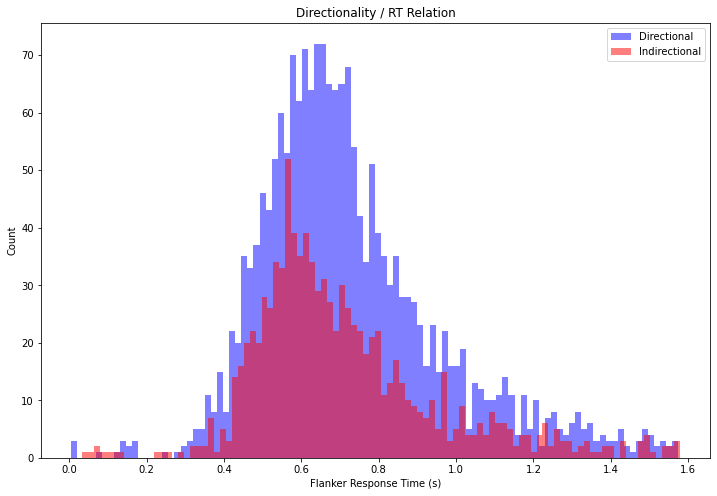

In [35]:
plt.hist(
    [flank.meta['response_time'] for flank in dataset if\
        flank.meta['directional'] is True],
    bins=100,
    alpha=0.5,
    label="Directional",
    color='blue')

plt.hist(
    [flank.meta['response_time'] for flank in dataset if\
        flank.meta['directional'] is False],
    bins=100,
    alpha=0.5,
    label="Indirectional",
    color='red')

plt.xlabel("Flanker Response Time (s)")
plt.ylabel("Count")
plt.title("Directionality / RT Relation")
plt.legend(loc='upper right')

In [36]:
yo4con = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 4) and (flank.meta['congruent'] == True) and (not math.isnan(flank.meta['response_time']))]
yo5con = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 5) and (flank.meta['congruent'] == True) and (not math.isnan(flank.meta['response_time']))]
yo6con = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 6) and (flank.meta['congruent'] == True) and (not math.isnan(flank.meta['response_time']))]
yo7con = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 7) and (flank.meta['congruent'] == True) and (not math.isnan(flank.meta['response_time']))]

yo4inc = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 4) and (flank.meta['congruent'] == False) and (not math.isnan(flank.meta['response_time']))]
yo5inc = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 5) and (flank.meta['congruent'] == False) and (not math.isnan(flank.meta['response_time']))]
yo6inc = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 6) and (flank.meta['congruent'] == False) and (not math.isnan(flank.meta['response_time']))]
yo7inc = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 7) and (flank.meta['congruent'] == False) and (not math.isnan(flank.meta['response_time']))]

yo4corr = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 4) and (flank.meta['correct'] == True) and (not math.isnan(flank.meta['response_time']))]
yo5corr = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 5) and (flank.meta['correct'] == True) and (not math.isnan(flank.meta['response_time']))]
yo6corr = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 6) and (flank.meta['correct'] == True) and (not math.isnan(flank.meta['response_time']))]
yo7corr = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 7) and (flank.meta['correct'] == True) and (not math.isnan(flank.meta['response_time']))]

yo4incorr = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 4) and (flank.meta['correct'] == False) and (not math.isnan(flank.meta['response_time']))]
yo5incorr = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 5) and (flank.meta['correct'] == False) and (not math.isnan(flank.meta['response_time']))]
yo6incorr = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 6) and (flank.meta['correct'] == False) and (not math.isnan(flank.meta['response_time']))]
yo7incorr = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 7) and (flank.meta['correct'] == False) and (not math.isnan(flank.meta['response_time']))]

yo4dir = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 4) and (flank.meta['directional'] == True) and (not math.isnan(flank.meta['response_time']))]
yo5dir = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 5) and (flank.meta['directional'] == True) and (not math.isnan(flank.meta['response_time']))]
yo6dir = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 6) and (flank.meta['directional'] == True) and (not math.isnan(flank.meta['response_time']))]
yo7dir = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 7) and (flank.meta['directional'] == True) and (not math.isnan(flank.meta['response_time']))]

yo4indir = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 4) and (flank.meta['directional'] == False) and (not math.isnan(flank.meta['response_time']))]
yo5indir = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 5) and (flank.meta['directional'] == False) and (not math.isnan(flank.meta['response_time']))]
yo6indir = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 6) and (flank.meta['directional'] == False) and (not math.isnan(flank.meta['response_time']))]
yo7indir = [flank.meta['response_time'] for flank in dataset if (flank.meta['age'] == 7) and (flank.meta['directional'] == False) and (not math.isnan(flank.meta['response_time']))]

In [37]:
corr = len([flank for flank in dataset if flank.meta['correct'] is True]) / len(dataset)
print(corr)

0.8136222910216718


In [38]:
print("Congruent")
print(np.mean(yo4con), np.std(yo4con))
print(np.mean(yo5con), np.std(yo5con))
print(np.mean(yo6con), np.std(yo6con))
print(np.mean(yo7con), np.std(yo7con))
print('\n')

print("Incongruent")
print(np.mean(yo4inc), np.std(yo4inc))
print(np.mean(yo5inc), np.std(yo5inc))
print(np.mean(yo6inc), np.std(yo6inc))
print(np.mean(yo7inc), np.std(yo7inc))
print('\n')

print("Correct")
print(np.mean(yo4corr), np.std(yo4corr))
print(np.mean(yo5corr), np.std(yo5corr))
print(np.mean(yo6corr), np.std(yo6corr))
print(np.mean(yo7corr), np.std(yo7corr))
print('\n')

print("Incorrect")
print(np.mean(yo4incorr), np.std(yo4incorr))
print(np.mean(yo5incorr), np.std(yo5incorr))
print(np.mean(yo6incorr), np.std(yo6incorr))
print(np.mean(yo7incorr), np.std(yo7incorr))
print('\n')

print("Directional")
print(np.mean(yo4dir), np.std(yo4dir))
print(np.mean(yo5dir), np.std(yo5dir))
print(np.mean(yo6dir), np.std(yo6dir))
print(np.mean(yo7dir), np.std(yo7dir))
print('\n')

print("Indirectional")
print(np.mean(yo4indir), np.std(yo4indir))
print(np.mean(yo5indir), np.std(yo5indir))
print(np.mean(yo6indir), np.std(yo6indir))
print(np.mean(yo7indir), np.std(yo7indir))
print('\n')

Congruent
nan nan
nan nan
nan nan
nan nan


Incongruent
nan nan
nan nan
nan nan
nan nan


Correct
nan nan
nan nan
nan nan
nan nan


Incorrect
nan nan
nan nan
nan nan
nan nan


Directional
nan nan
nan nan
nan nan
nan nan


Indirectional
nan nan
nan nan
nan nan
nan nan




/home/usr/schneiderc/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/usr/schneiderc/.local/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/usr/schneiderc/.local/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/usr/schneiderc/.local/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/home/usr/schneiderc/.local/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [121]:
print(np.std(yo4))

0.29764980947211406


In [46]:
yo4

nan

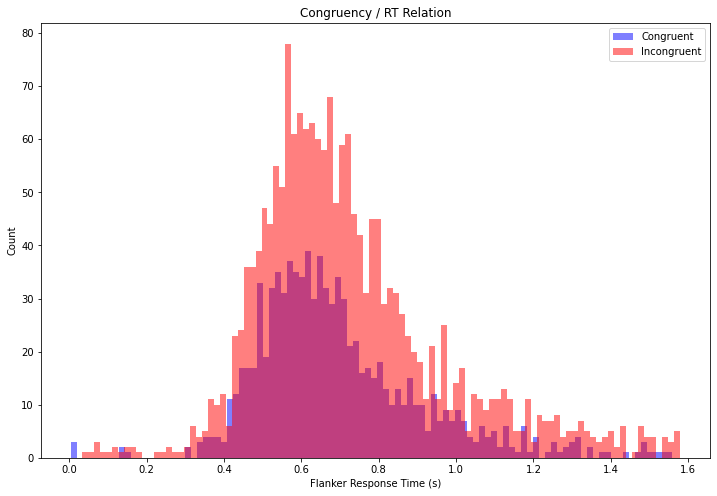

In [17]:
plt.hist(
    [flank.meta['response_time'] for flank in dataset if\
        flank.meta['congruent'] is True],
    bins=100,
    alpha=0.5,
    label="Congruent",
    color='blue')

plt.hist(
    [flank.meta['response_time'] for flank in dataset if\
        flank.meta['congruent'] is False],
    bins=100,
    alpha=0.5,
    label="Incongruent",
    color='red')

plt.xlabel("Flanker Response Time (s)")
plt.ylabel("Count")
plt.title("Congruency / RT Relation")
plt.legend(loc='upper right')

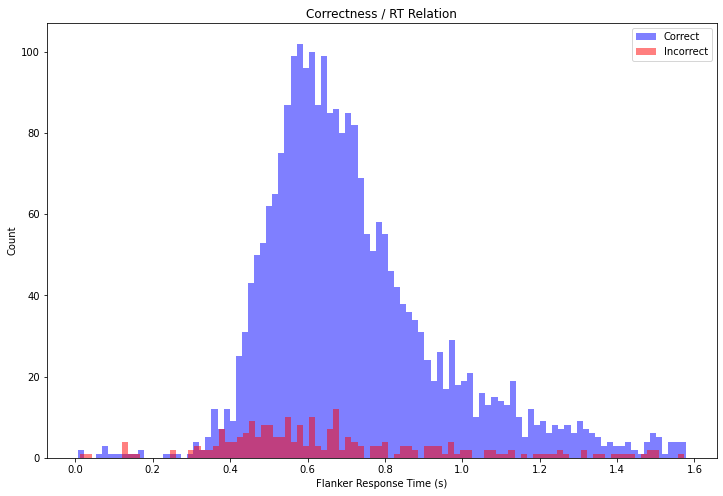

In [18]:
plt.hist(
    [flank.meta['response_time'] for flank in dataset if\
        flank.eval() is True],
    bins=100,
    alpha=0.5,
    label="Correct",
    color='blue')

plt.hist(
    [flank.meta['response_time'] for flank in dataset if\
        flank.eval() is False],
    bins=100,
    alpha=0.5,
    label="Incorrect",
    color='red')

plt.xlabel("Flanker Response Time (s)")
plt.ylabel("Count")
plt.title("Correctness / RT Relation")
plt.legend(loc='upper right')

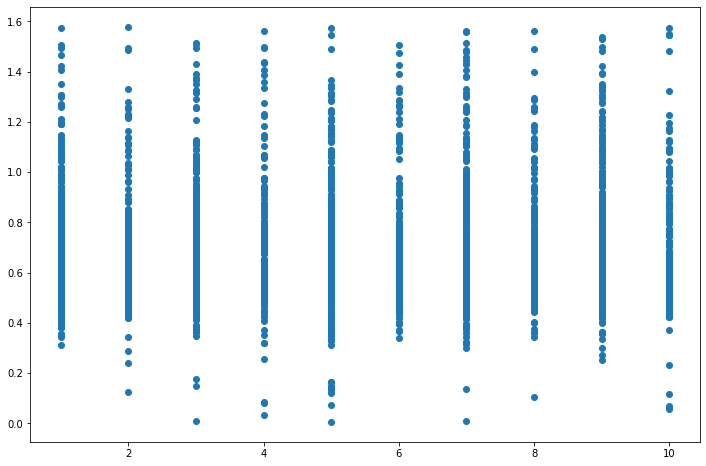

In [19]:
plt.scatter(
    [flank.meta['block'] for flank in dataset],
    [flank.meta['response_time'] for flank in dataset]
)

(array([450.,   0., 300., 150., 380., 150., 300., 150., 450., 750.]),
 array([4.35318275, 4.71540041, 5.07761807, 5.43983573, 5.80205339,
        6.16427105, 6.52648871, 6.88870637, 7.25092402, 7.61314168,
        7.97535934]),
 <BarContainer object of 10 artists>)

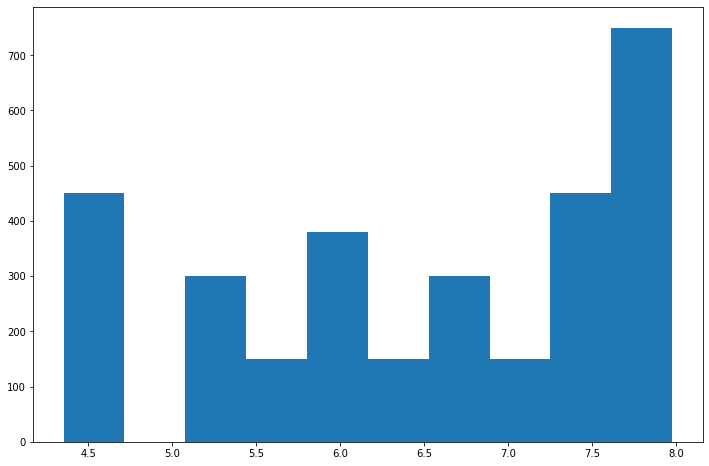

In [41]:
plt.hist(
    [flank.meta['age'] for flank in dataset]
)